In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [6]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/ML_Final Project_Nguyen Hoang Do Uyen/'

Mounted at /content/drive


# **I. Question 1.**

# **1.1 EDA**

In [7]:
#Load data
df = pd.read_excel(path + 'churn_prediction.xlsx')

In [8]:
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07
3,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231.48
4,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165.14


In [9]:
df.tail(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55535,0,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,NaN,1.0,2.0,1.0,303.75
5626,55538,0,23.0,Computer,1,9.0,Debit Card,Male,3.0,4,Others,1,Married,5,0,NaN,5.0,5.0,4.0,316.61
5627,55562,0,29.0,Mobile Phone,2,33.0,UPI,Male,4.0,2,Others,4,Married,6,1,NaN,2.0,2.0,5.0,321.36
5628,55598,0,13.0,Computer,1,16.0,Debit Card,Male,3.0,4,Others,1,Single,4,0,NaN,2.0,2.0,4.0,319.31
5629,55604,0,16.0,Mobile Phone,1,9.0,Debit Card,Male,3.0,4,Others,3,Married,7,0,NaN,1.0,5.0,15.0,313.80


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [11]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [12]:
df.shape

(5630, 20)

In [13]:
# Check missing values in each column
check_missing = df.isna().sum()

# Print the missing values count for each column
print(check_missing)

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [14]:
# Check for duplicate rows
check_dup = df.duplicated().sum()

# Print the number of duplicate rows
print(check_dup)


0


In [15]:
# Check the distribution of continuous variables
continuous_cols = df.select_dtypes(include=['int', 'float64']).columns

# Get the number of unique values in each continuous variable
unique_value_in_continuous_col = df[continuous_cols].nunique()
print(unique_value_in_continuous_col)

CustomerID                     5630
Churn                             2
Tenure                           36
CityTier                          3
WarehouseToHome                  34
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
SatisfactionScore                 5
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64


Since the columns **Tenure**, **WarehouseToHome**, **HourSpendOnApp**, **OrderAmountHikeFromLastYear**, **CouponUsed**, **OrderCount**, and **DaySinceLastOrder** have missing values and outliers, we will replace the missing values with the median.


In [16]:
# Define the list of columns with missing values
cols_missing = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

# Replace missing columns with median
for col in cols_missing:
  df[col].fillna(value= df[col].median(), inplace=True)

<ipython-input-16-f13180dd9108>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value= df[col].median(), inplace=True)


**2. Univariate Analyse**

**Categorical variables**

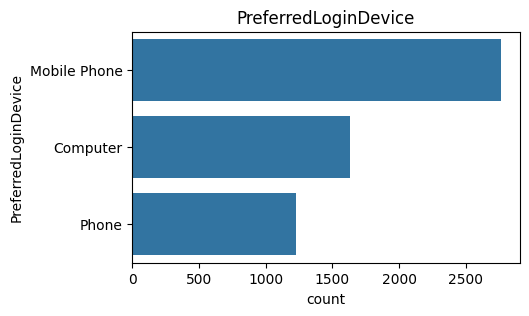

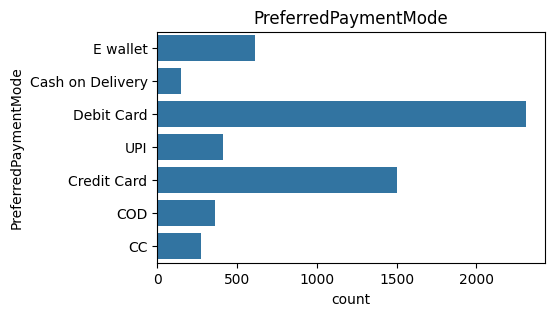

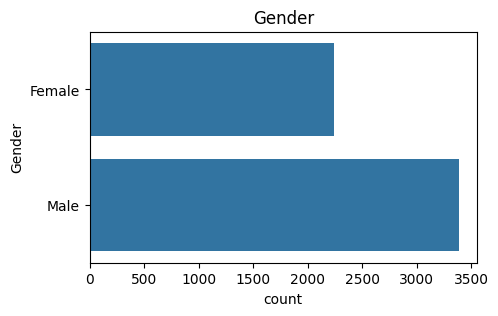

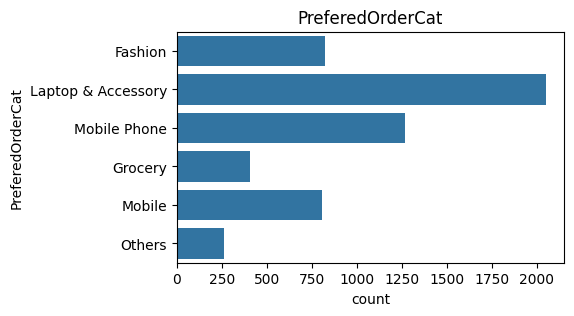

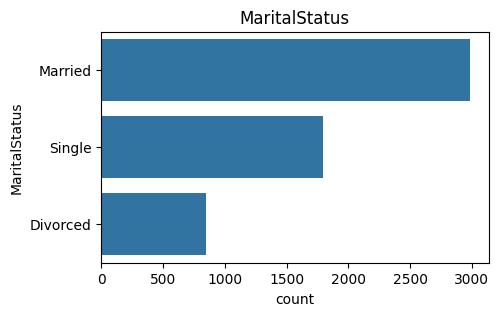

In [17]:
# Select columns with categorical (object) data type
cat_cols = df.select_dtypes(include='object')

# Plot the distribution of values
for col in cat_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(df[col])
  plt.title(col)
  plt.show()

There is nothing unusual in the distribution of the categorical variables. However, there are columns with the same data but different names, so they need to be merged.


In [18]:
# Merge columns with the same data but different names
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({
    'COD': 'Cash on Delivery',  # Replace 'COD' with 'Cash on Delivery'
    'CC': 'Credit Card'  # Replace 'CC' with 'Credit Card'
})

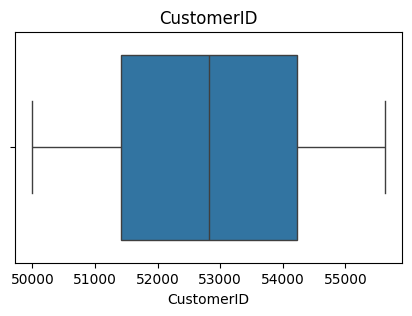

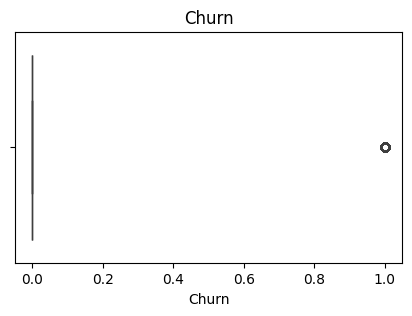

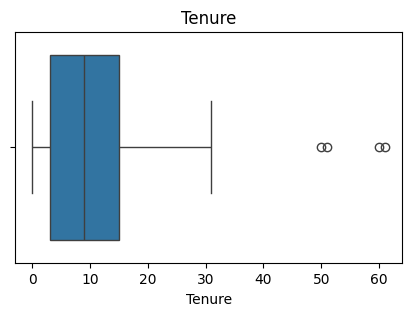

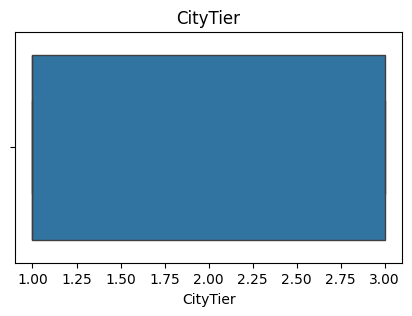

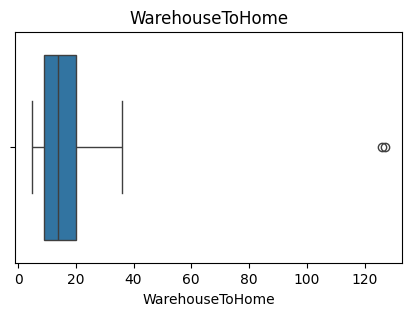

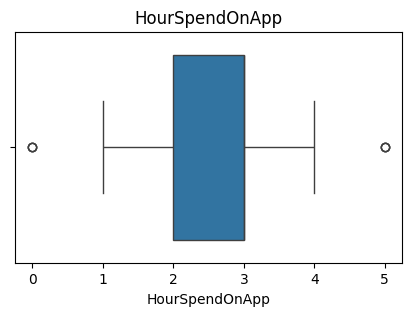

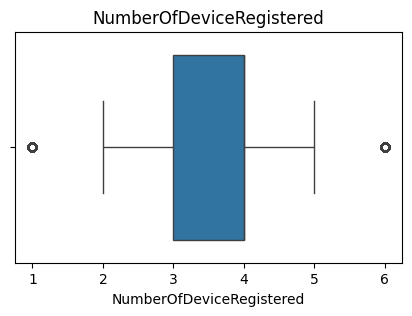

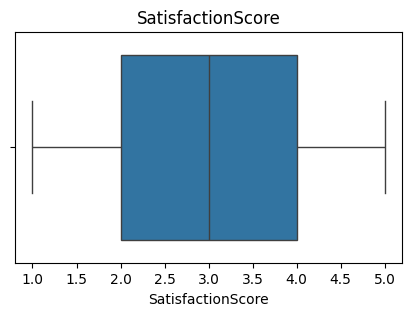

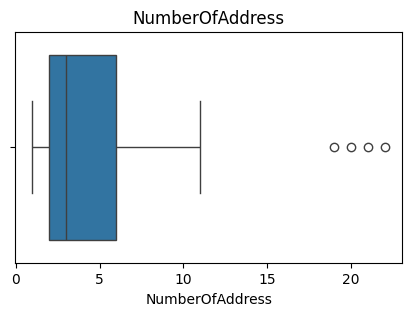

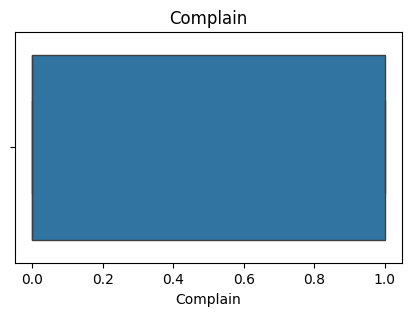

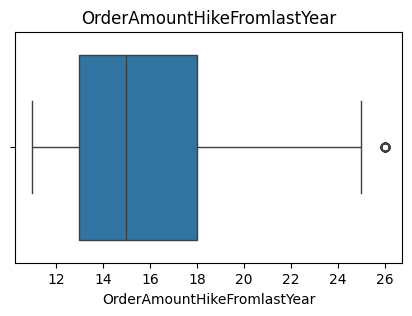

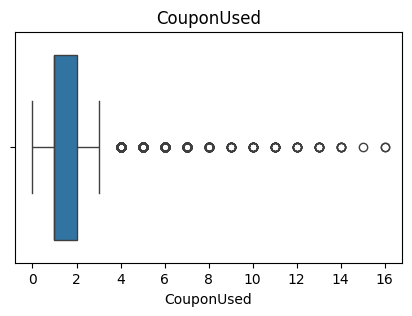

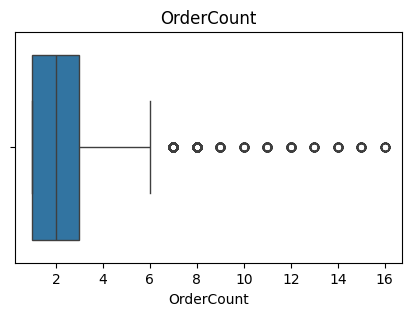

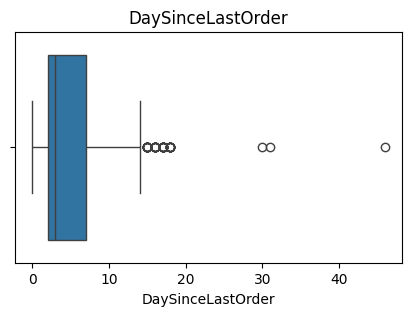

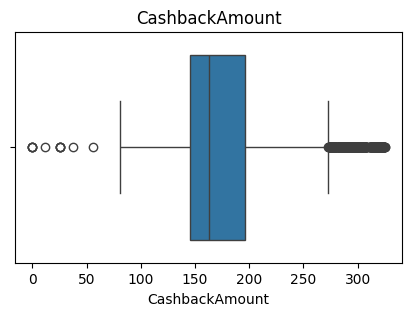

In [19]:
# Plot boxplot to check the distribution of continuous variables
for col in continuous_cols:
  if df[col].dtype in ['int', 'float64']:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

**Observation:** The outliers in these columns are reasonable and reflect customer behavior. These outliers could be characteristic factors that determine whether a customer will churn or not. Therefore, we decide to keep all the outliers.


In [20]:
# Print the first few rows of the dataset to check the final result
df.head()

# Print dataset info to verify missing values and column types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [21]:
# Apply one-hot encoding to categorical columns with a small number of unique values
df_encoded = pd.get_dummies(df, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus', 'PreferredLoginDevice'])

# Apply label encoding to the 'Gender' column (converts categorical labels to numerical values)
label_encoder = LabelEncoder()
df_encoded['Gender'] = label_encoder.fit_transform(df_encoded['Gender'])

# Drop the 'CustomerID'
df_encoded = df_encoded.drop(columns=['CustomerID'])


In [22]:
df_encoded

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone
0,0,20.0,3,7.0,0,4.0,4,5,3,0,...,False,False,False,False,False,True,False,False,True,False
1,0,13.0,1,9.0,0,4.0,4,3,2,0,...,False,False,False,False,False,False,True,True,False,False
2,0,16.0,3,7.0,1,3.0,4,3,3,0,...,True,False,False,False,True,False,False,False,True,False
3,0,5.0,1,16.0,1,3.0,4,4,3,0,...,False,False,False,False,False,True,False,False,True,False
4,0,9.0,1,28.0,0,3.0,4,2,3,1,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,61.0,3,28.0,0,4.0,4,1,6,1,...,False,False,False,False,False,True,False,False,True,False
5626,0,23.0,1,9.0,1,3.0,4,1,5,0,...,False,False,False,True,False,True,False,True,False,False
5627,0,29.0,2,33.0,1,4.0,2,4,6,1,...,False,False,False,True,False,True,False,False,True,False
5628,0,13.0,1,16.0,1,3.0,4,1,4,0,...,False,False,False,True,False,False,True,True,False,False


**Split train/validate/test set**

In [23]:
# Split the data into features (X) and target (y)
x = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']  # Target

# Split into training and testing sets (70/30 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


**Normalization for each set**

In [24]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **1.2 Apply Model**

In [25]:
# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train_scaled, y_train)

# Make predictions on training and test sets
y_pred_train = clf.predict(x_train_scaled)
y_pred_test = clf.predict(x_test_scaled)


# **1.3 Evaluate & Fine Tune Model**

In [26]:
# Evaluate model accuracy
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
train_balanced_acc = balanced_accuracy_score(y_train, y_pred_train)
test_balanced_acc = balanced_accuracy_score(y_test, y_pred_test)

# Print the results
print(f'Training Accuracy: {train_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Training Balanced Accuracy: {train_balanced_acc:.4f}')
print(f'Test Balanced Accuracy: {test_balanced_acc:.4f}')

Training Accuracy: 1.0000
Test Accuracy: 0.9343
Training Balanced Accuracy: 1.0000
Test Balanced Accuracy: 0.8421


Model đang bị overfitting khi tập train học tốt nhưng bị giảm ở tập test -> Cần fine tune

In [27]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='balanced_accuracy')

# Fit the model and find the best parameters
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best Params:", grid_search.best_params_)


Best Params: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [28]:
# Evaluate the best model found by GridSearchCV
best_clf = grid_search.best_estimator_

# Predict on the training and test sets
y_train_best_pred = best_clf.predict(x_train)  #
y_test_best_pred = best_clf.predict(x_test)

# Calculate balanced accuracy for both train and test sets
train_balanced_accuracy_best = balanced_accuracy_score(y_train, y_train_best_pred)
test_balanced_accuracy_best = balanced_accuracy_score(y_test, y_test_best_pred)

# Print the results
print("Train accuracy: ", train_balanced_accuracy_best)
print("Test accuracy: ", test_balanced_accuracy_best)



Train accuracy:  1.0
Test accuracy:  0.8746663674517874


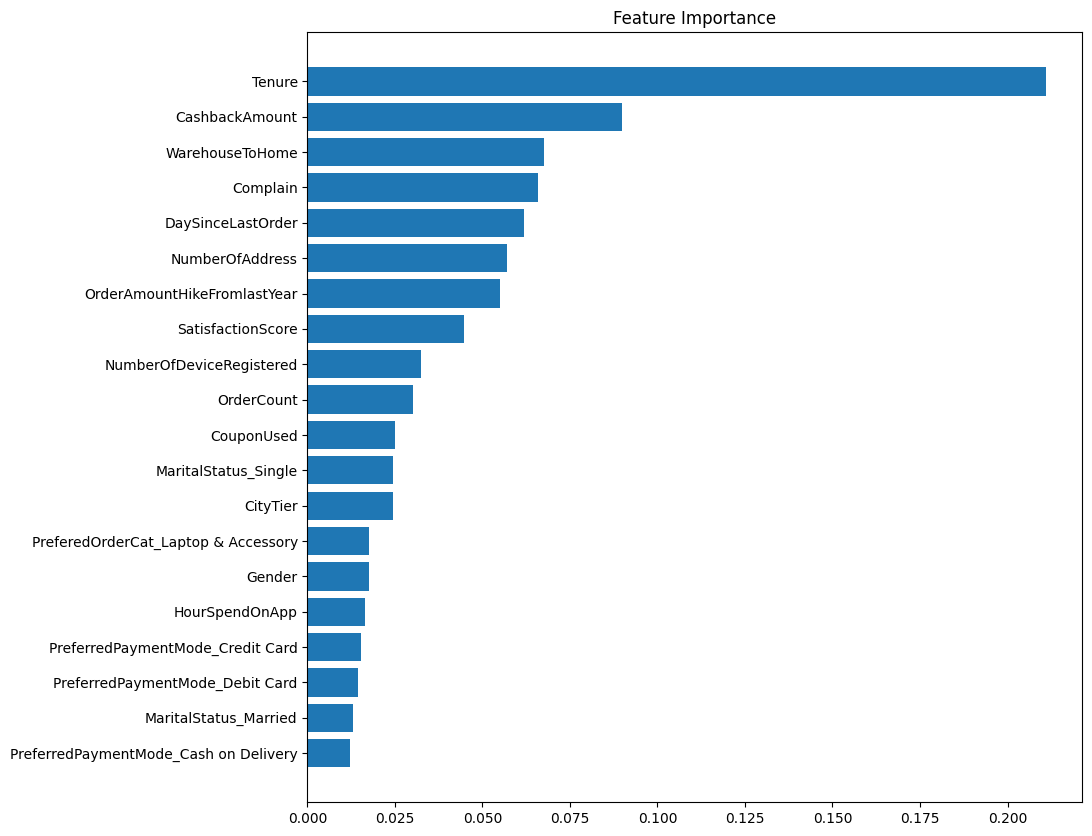

In [29]:
# Get feature importances from the best model
feats = {feature: importance for feature, importance in zip(x_train.columns, best_clf.feature_importances_)}

# Create a DataFrame for feature importances
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importances'})
importances = importances.sort_values(by='Importances', ascending=True).reset_index()

# Plot the feature importances
plt.figure(figsize=(10,10))
plt.barh(importances.tail(20)['index'], importances.tail(20)['Importances'])  # Plot top 20 features
plt.title('Feature Importance')
plt.show()


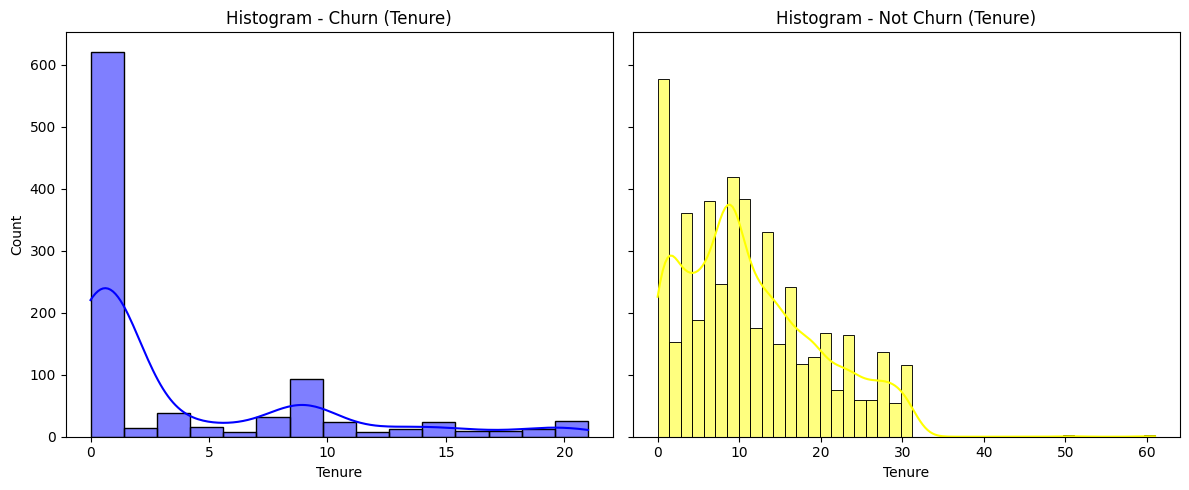

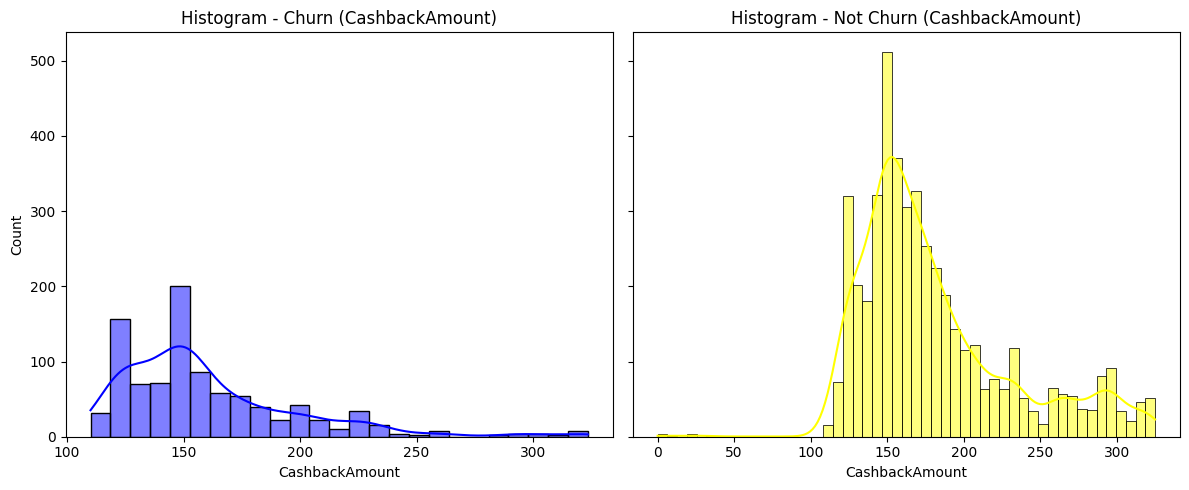

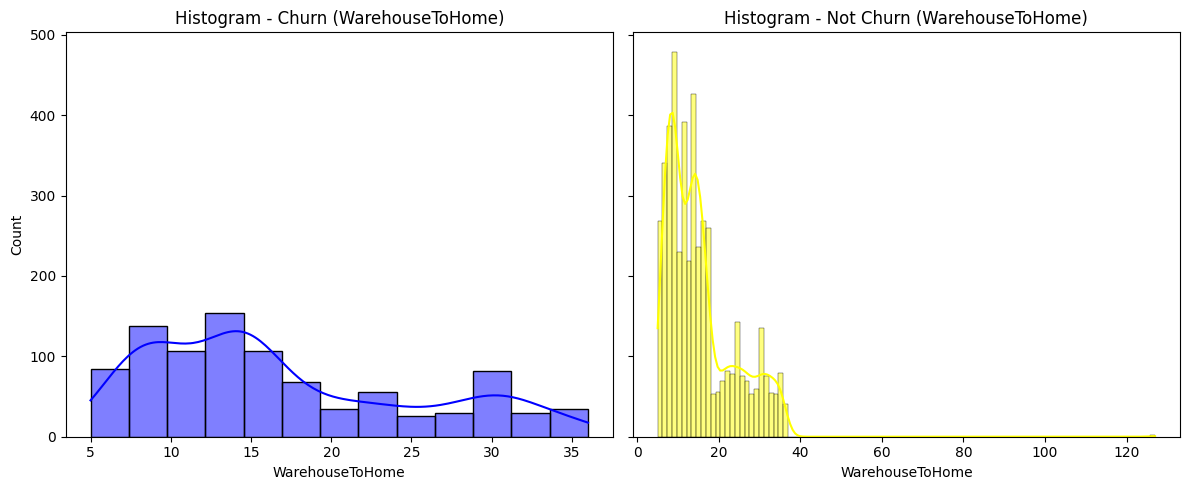

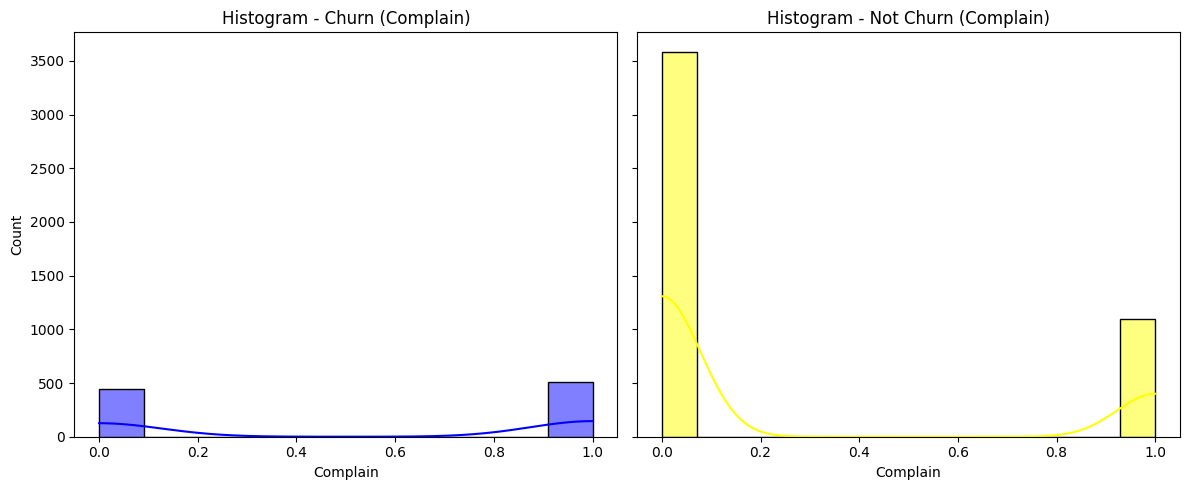

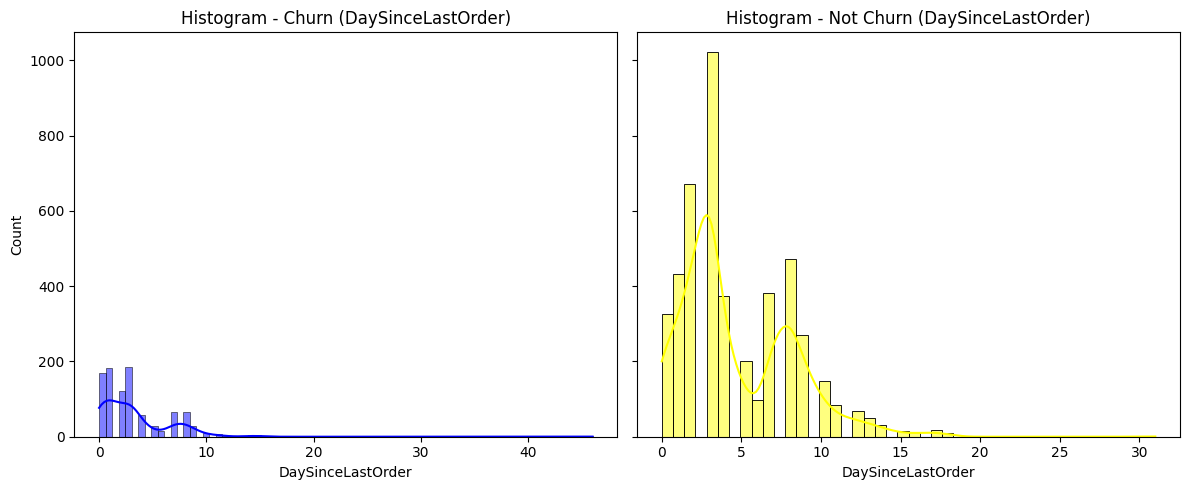

In [30]:
def plot_hist(df, group_column, feature_column, kde=True):
    for column in feature_column:
        # Create subplots
        fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

        # Filter data for churned and not churned users
        churned_data = df[df[group_column] == 1][column]
        not_churned_data = df[df[group_column] == 0][column]

        # Calculate histogram bins for each group
        bins_churned = np.histogram(churned_data, bins='auto')[1]
        not_bins_churned = np.histogram(not_churned_data, bins='auto')[1]

        # Plot histograms with KDE (Kernel Density Estimation)
        sns.histplot(churned_data, bins=bins_churned, kde=kde, color='blue', ax=axes[0])
        axes[0].set_title(f'Histogram - Churn ({column})')
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Count')

        sns.histplot(not_churned_data, bins=not_bins_churned, kde=kde, color='yellow', ax=axes[1])
        axes[1].set_title(f'Histogram - Not Churn ({column})')
        axes[1].set_xlabel(column)
        axes[1].set_ylabel('Count')

        # Adjust layout and display plots
        plt.tight_layout()
        plt.show()

# Define the list of feature columns
feature_column = ["Tenure", "CashbackAmount", "WarehouseToHome", "Complain", "DaySinceLastOrder"]

# Call the function to plot histograms for churned and non-churned users
plot_hist(df, "Churn", feature_column, kde=True)


# **1.4 Insight**

| Metric                     | Churn (Blue) | Non-Churn (Yellow) | Insight |
|----------------------------|-------------|---------------------|---------|
| **Tenure (Customer Lifespan)** | 80% leave within 5 months, very few stay beyond 10 months | More evenly distributed, many customers stay over 20 months | **Churned customers tend to leave very early**, meaning the initial experience is crucial. Without an effective retention strategy, they will churn quickly. |
| **CashbackAmount (Cashback Received)** | Average around 100-200, widely distributed | Mostly concentrated between 120-250 | **Churned customers receive less cashback**, which may lead to a lower perceived financial benefit. Increasing cashback or introducing alternative incentives might help retention. |
| **WarehouseToHome (Delivery Time)** | Wide distribution, average around 15-30 days, some exceeding 35 days | Mostly under 20 days, rarely exceeding 25 days | **Longer delivery times correlate with higher churn rates**. Optimizing logistics and reducing shipping time could enhance customer retention. |
| **Complain (Customer Complaints)** | Two extremes: either 0 or 1, with ~50%-50% lodging complaints | Similar pattern, but most customers do not complain, complains only accoounts for 10-15% | **Churned customers have a higher complaint rate**, but many also leave without complaining. This suggests that some dissatisfied customers simply churn without providing feedback, requiring a more proactive approach. |
| **DaySinceLastOrder (Days Since Last Order)** | Widely spread, most over 10 days, with many exceeding 20 days | Mostly under 10 days, rarely over 15 days | **Churned customers order less frequently**, meaning if they don’t make a purchase soon, they are likely to leave. A strategy to encourage repeat purchases, such as discounts for quick reorders, could be beneficial. |

---

## **Key Takeaways**
1. **The initial experience is a critical factor** → If customers are dissatisfied early on, they are likely to churn.  
2. **Lower cashback may reduce retention rates** → Consider adjusting cashback incentives or introducing alternative rewards.  
3. **Longer delivery times increase churn risk** → Optimize shipping logistics to shorten delivery times.  
4. **Many customers churn without lodging complaints** → Proactively gather feedback before they decide to leave.  
5. **Low order frequency is an early churn indicator** → Implement strategies like time-sensitive discounts to encourage repeat purchases sooner.  



# **1.5 Recommendation**  

**🌟 Improve Initial Customer Experience**  
**🔹 Problem:** 80% of churned customers leave within 5 months.  
**✅ Solution:**  
- Launch a **welcome program** (onboarding emails, tutorials, live chat).  
- Offer **first-time discounts** or membership perks.  
- Provide **personalized recommendations** to boost engagement.  

---  

**💰 Optimize Cashback & Loyalty Rewards**  
**🔹 Problem:** Churned customers receive less cashback, reducing perceived value.  
**✅ Solution:**  
- Implement **tiered cashback programs** (higher spend = higher cashback).  
- Offer **time-sensitive bonuses** to encourage repeat purchases.  
- Provide **alternative rewards** like free shipping or exclusive discounts.  

---  

**🚀 Improve Delivery Speed & Logistics**  
**🔹 Problem:** Longer delivery times increase churn rates.  
**✅ Solution:**  
- **Optimize warehouse locations** for faster fulfillment.  
- Partner with **multiple shipping carriers** for speed.  
- Provide **real-time tracking** and estimated delivery updates.  

---  

**💬 Address Customer Complaints Proactively**  
**🔹 Problem:** Dissatisfied customers either complain frequently or silently leave.  
**✅ Solution:**  
- Use an **AI chatbot** or dedicated support team to resolve issues early.  
- Offer **compensation (discounts, free items, faster delivery)** before they churn.  
- Apply **sentiment analysis** to predict dissatisfaction and act.  

---  

**🔄 Encourage Frequent Purchases**  
**🔹 Problem:** Longer gaps between orders increase churn risk.  
**✅ Solution:**  
- Launch **time-sensitive discounts** (e.g., "10% off if you reorder in 7 days").  
- Use **personalized email reminders** with incentives.  
- Introduce a **subscription model** for repeat purchases

# **II. Question 2.**

In [31]:
# Select top features affecting Churn
top_features = ['Tenure', 'CashbackAmount', 'WarehouseToHome', 'Complain', 'DaySinceLastOrder']
x_1 = df[top_features]
y_1 = df['Churn']

# Split: 70% train, 30% temp (val + test)
x_train1, x_val1, y_train1, y_val1 = train_test_split(x_1, y_1, test_size=0.3, random_state=42)

# Split temp into 15% val, 15% test
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_val1, y_val1, test_size=0.5, random_state=42)

# Check dataset sizes
print(f"Train: {x_train1.shape}, Val: {x_val1.shape}, Test: {x_test1.shape}")


Train: (3941, 5), Val: (844, 5), Test: (845, 5)


In [32]:
#Normalize data
from sklearn.preprocessing import StandardScaler
scaler_1 = StandardScaler()
x_train1_scaled = scaler.fit_transform(x_train1)
x_val1_scaled = scaler.transform(x_val1)
x_test1_scaled = scaler.transform(x_test1)

# 2.1 Choose Model

Dùng chỉ số Recall làm chỉ số chính để so sánh hiệu quả giữa các model

In [33]:
# Initialize Random Forest model with 100 trees and max depth of 15
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)

# Train the model using the scaled training data
clf_rf.fit(x_train1_scaled, y_train1)

# Predict on the validation set
y_pred_val_rf = clf_rf.predict(x_val1_scaled)

# Evaluate model performance using recall score
recall_RF = recall_score(y_val1, y_pred_val_rf)
print('The Recall of Random Forest Model is', recall_RF)

The Recall of Random Forest Model is 0.697986577181208


In [34]:
# Initialize Logistic Regression model
clf_lr = LogisticRegression()

# Train the model using the scaled training data
clf_lr.fit(x_train1_scaled, y_train1)

# Predict on the validation set
y_pred_val_lr = clf_lr.predict(x_val1_scaled)

# Evaluate model performance using recall score
recall_LR = recall_score(y_val1, y_pred_val_lr)
print('The Recall of Logistic Regression is', recall_LR)

The Recall of Logistic Regression is 0.3288590604026846


In [35]:
# Initialize the KNN model
knn = KNeighborsClassifier()

# Train the model with the scaled training data
knn.fit(x_train1_scaled, y_train1)

# Make predictions on the validation set
y_pred_val_knn = knn.predict(x_val1_scaled)

# Evaluate the model using the recall score
recall_KNN = recall_score(y_val1, y_pred_val_knn)

# Print the recall score of the KNN model
print('The Recall of KNN Model is', recall_KNN)


The Recall of KNN Model is 0.4697986577181208


In [36]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the model with the scaled training data
xgb_model.fit(x_train1_scaled, y_train1)

# Make predictions on the validation set
y_pred_val_xgb = xgb_model.predict(x_val1_scaled)

# Evaluate the model using the recall score
recall_XGB = recall_score(y_val1, y_pred_val_xgb)

# Print the recall score of the XGBoost model
print('The Recall of GBoost Model is', recall_XGB)

The Recall of GBoost Model is 0.6442953020134228


In [37]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Train the model with the scaled training data
gb_model.fit(x_train1_scaled, y_train1)

# Make predictions on the validation set
y_pred_val_gb = gb_model.predict(x_val1_scaled)

# Evaluate the model using the recall score
recall_GB = recall_score(y_val1, y_pred_val_gb)

# Print the recall score of the Gradient Boosting model
print('The Recall of Gradient GBoost Model is', recall_GB)


The Recall of Gradient GBoost Model is 0.5167785234899329


Sau khi chạy 5 mô hình, RF là mô hình có chỉ số Recall tốt nhất -> Chọn và Fine tune

# **2.2 Fine-Tune model**

In [38]:
# Set param
param_xgb = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5]
}

# Perform a randomized search over the specified parameter grid
rf_finetune = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_xgb, n_iter=20, cv=5, scoring='recall', random_state=42)

# Fit the randomized search model on the training data
rf_finetune.fit(x_train1_scaled, y_train1)

# Print the best hyperparameters found by the search
print("Best parameters found:", rf_finetune.best_params_)

# Print the best recall score obtained during cross-validation
print("Best recall score:", rf_finetune.best_score_)

Best parameters found: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
Best recall score: 0.7414907573047108


In [39]:
# Get the best model found from the randomized search
best_model_1 = rf_finetune.best_estimator_

# Test and evaluate the model on the test set
y1_pred_test = best_model_1.predict(x_test1_scaled)

# Calculate the recall score on the test set
recall_test = recall_score(y_test1, y1_pred_test)

# Print the recall score on the test set
print(f"Recall on the test set: {recall_test:.4f}")


Recall on the test set: 0.7320


In [40]:
# Calculate precision score on the test set
precision_test = precision_score(y_test1, y1_pred_test)

# Calculate F1-score on the test set
f1_test = f1_score(y_test1, y1_pred_test)

# Print precision score on the test set
print(f"Precision: {precision_test:.4f}")

# Print F1-score on the test set
print(f"F1-score: {f1_test:.4f}")

Precision: 0.8235
F1-score: 0.7751


In [41]:
# Calculate the confusion matrix on the test set
cm = confusion_matrix(y_test1, y1_pred_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[668  24]
 [ 41 112]]


# **Question 3**

In [42]:
# Filter 'Churn' data
df_churned = df[df['Churn'] == 1].copy()
print(f"Số lượng khách hàng churned: {df_churned.shape[0]}")
df_churned.head()

Số lượng khách hàng churned: 948


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
7,53583,1,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,Mobile Phone,4,Single,3,1,26.0,2.0,2.0,1.0,143.59
24,55053,1,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,Mobile Phone,4,Single,3,1,26.0,1.0,2.0,1.0,143.59
40,50768,1,9.0,Computer,1,16.0,Credit Card,Female,3.0,4,Mobile Phone,4,Single,2,1,25.0,1.0,1.0,0.0,118.59
58,52238,1,9.0,Computer,1,16.0,Credit Card,Female,3.0,4,Mobile Phone,4,Single,2,1,25.0,0.0,1.0,0.0,118.59
68,52834,1,1.0,Computer,1,14.0,Debit Card,Male,4.0,6,Laptop & Accessory,3,Single,3,1,25.0,2.0,2.0,7.0,185.74


# **3.1 PCA**

In [70]:
# One-hot encoding
df_churned_encoded = pd.get_dummies(df_churned,
                                    columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus'])
# Label encoding
le = LabelEncoder()
df_churned_encoded.loc[:, 'Gender'] = le.fit_transform(df_churned_encoded['Gender'])

In [71]:
# Normalize data
scaler = RobustScaler()
df_churned_final = scaler.fit_transform(df_churned_encoded)

In [72]:
# Initialize PCA with 90% variance retention
pca = PCA(n_components=0.90)

# Apply PCA transformation to the dataset
pca_final = pca.fit_transform(df_churned_final)

# Print the number of principal components retained
print(f'Number of principal components retained: {pca_final.shape[1]}')

# Print the explained variance ratio for each principal component
pca.explained_variance_ratio_


Number of principal components retained: 17


array([0.35826035, 0.09588705, 0.06619029, 0.05461026, 0.03892344,
       0.03751898, 0.03611263, 0.03117   , 0.02929039, 0.02807674,
       0.02495804, 0.02111083, 0.01956535, 0.01884904, 0.01744937,
       0.01596449, 0.01483289])

In [46]:
# Convert PCA into dataframe
pca_df = pd.DataFrame(pca_final, columns=[f"col{i+1}" for i in range(pca_final.shape[1])])
pca_df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16
0,-0.313564,1.202533,1.234286,-1.733841,1.123337,-0.502943,-0.248539,-0.307540,0.071523,-0.416252,-0.224674,0.401305,-0.368937,-0.592663,0.726531,-0.061401
1,-1.044865,0.667937,1.288572,-1.933136,1.178064,-0.710274,0.164051,-0.298379,0.038295,-0.372064,-0.194300,0.425825,-0.457942,-0.538373,0.768711,-0.006692
2,-1.585230,1.092800,0.200376,-0.609120,1.730919,-0.639652,-0.680237,-0.360163,0.477145,-0.355772,-0.457747,0.345623,-0.696350,-0.381884,0.400699,0.253732
3,-2.316531,0.558203,0.254662,-0.808416,1.785645,-0.846984,-0.267647,-0.351002,0.443917,-0.311584,-0.427373,0.370143,-0.785354,-0.327595,0.442880,0.308441
4,0.500618,-0.461943,0.708676,-1.877334,0.203592,-0.506353,-1.047490,-0.678437,0.523057,-0.890235,0.416008,0.569106,0.472145,-0.681171,0.343442,-0.419447


# **3.3 Apply Model & Segmentation**

**1. Choosing K:**

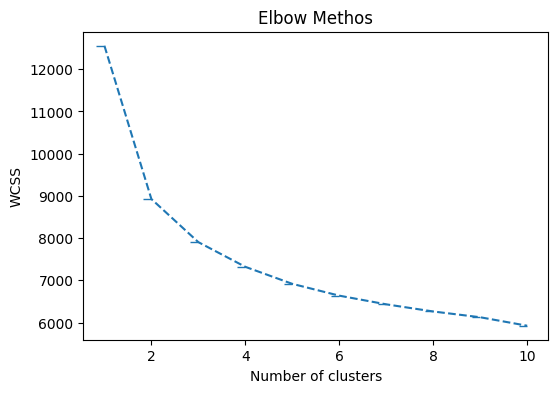

In [47]:
#Calculate KMeans
from sklearn.cluster import KMeans
ss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, n_init=10, random_state=42, init='k-means++')
  kmeans.fit(pca_df)
  ss.append(kmeans.inertia_)

#Plot the Elbow
plt.figure(figsize = (6,4))
plt.plot(range(1,11), ss, marker=0, linestyle='--')
plt.title('Elbow Methos')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Chọn K = 4

In [48]:
# Initialize KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, init='k-means++')

# Apply KMeans and get predicted labels
predicted_labels = kmeans.fit_predict(pca_df)

# Add cluster labels to dataframes
pca_df['cluster'] = predicted_labels
df_churned_encoded['cluster'] = predicted_labels
df_churned['cluster'] = predicted_labels

# **3. 4 Evaluate Model**

In [49]:
# Calculate and print silhouette score
sil_score = silhouette_score(pca_df, predicted_labels)
print(sil_score)

0.1681732418890018


<ipython-input-50-2208bd7fe185>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df_churned["cluster"], palette='coolwarm')


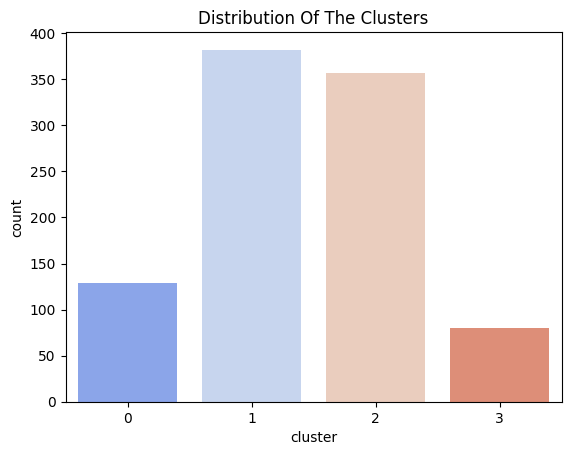

In [50]:
# Plot the distribution of clusters
pl = sns.countplot(x=df_churned["cluster"], palette='coolwarm')
pl.set_title("Distribution Of The Clusters")
plt.show()

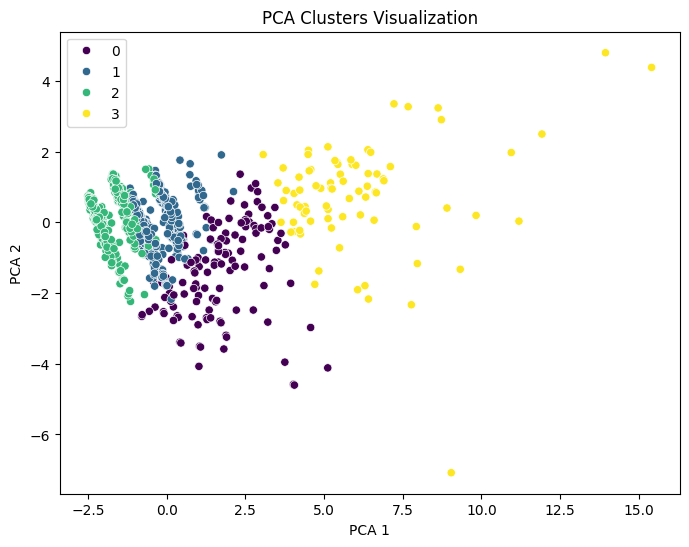

In [51]:
# Visualize the clusters in 2D PCA space
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df.values[:,0], y=pca_df.values[:,1], hue=predicted_labels, palette='viridis')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Clusters Visualization")
plt.show()




- **PCA does not retain the significant meaning of the data** (the sum of the explained variance ratio is too low).
- When applying the **Elbow method**, no clear elbow points are visible.
- **Our hypothesis** is that the data is **sporadic**, meaning there are no clear patterns between the data points, and therefore, clustering into distinct groups is challenging.
- **Silhouette score is also low**, indicating that the clusters are not well-separated.

### **Suggestions:**
- **Use clustering methods that do not require a fixed number of clusters**. We suggest trying a **Hierarchical Clustering model**, which can provide better-defined clusters without the need to predefine the number of clusters.


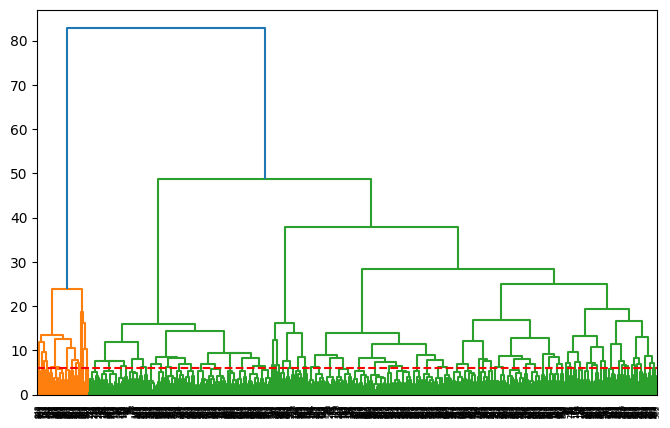

In [80]:
X_pca = pca_df.values

# Draw dendrogram
plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')
plt.show()


Base on the dendrogram chart -> we will choose k=3

Silhouette Score: 0.1319127936694198


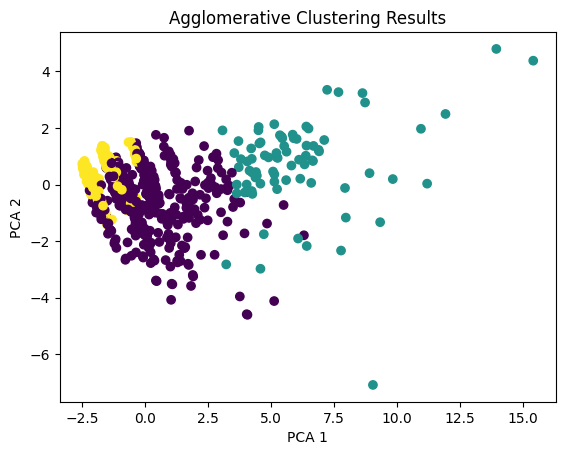

In [81]:
# Apply Agglomerative Clustering with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters = agg_clustering.fit_predict(pca_df)

# Calculate the Silhouette Score
sil_score = silhouette_score(pca_df, clusters)
print(f"Silhouette Score: {sil_score}")

# Visualize the clusters (if pca_df is 2D or 3D)
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('Agglomerative Clustering Results')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()